In [1]:
from utils import align_face, face_morph
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np	

/Users/oliverlundin/miniforge3/envs/facemorphing/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
anna_path = 'images/anna.jpg'
filip_path = 'images/filip.jpg'

emma_path = 'images/emma.jpg'
oliver_path = 'images/oliver.jpg'

vilma_path = 'images/vilma.jpg'
emma_path = 'images/emma.jpg'

vilma_path = 'images/vilma.jpg'
oliver_path = 'images/oliver.jpg'

pier_path = 'images/pier.jpg'
tom_path = 'images/georgeClooney.jpg'

marcus_path = 'images/marcus.jpeg'
wilhelm_path = 'images/wilhelm.jpeg'

# create a list
pairs = [
	(marcus_path, wilhelm_path),
	
]

In [3]:
# align all faces

aligned_pairs = []
for pair in pairs:
	aligned_pair = []
	for path in pair:
		path = Image.open(path)
		aligned_pair.append(align_face(path))
	aligned_pairs.append(aligned_pair)

print(aligned_pairs)

[[<PIL.Image.Image image mode=RGB size=256x256 at 0x2865C1220>, <PIL.Image.Image image mode=RGB size=256x256 at 0x17FA7B7C0>]]


In [4]:
# traverse aligned pairs
morphed = []
for i, pair in enumerate(aligned_pairs):
	# morph faces
	morphed.append(face_morph(pair[0], pair[1], 500, False))
	

MPS is available
Computing W midpoint and stddev using 10000 samples...
step    1/500: dist 0.62 loss 5448.48
step    2/500: dist 0.65 loss 36202.05
step    3/500: dist 0.61 loss 35333.54
step    4/500: dist 0.63 loss 33621.89
step    5/500: dist 0.59 loss 31262.17
step    6/500: dist 0.59 loss 28496.62
step    7/500: dist 0.56 loss 25595.98
step    8/500: dist 0.60 loss 22722.34
step    9/500: dist 0.59 loss 19904.62
step   10/500: dist 0.55 loss 17108.10
step   11/500: dist 0.56 loss 14313.81
step   12/500: dist 0.56 loss 11565.49
step   13/500: dist 0.54 loss 8913.89
step   14/500: dist 0.55 loss 6435.72
step   15/500: dist 0.59 loss 4320.21
step   16/500: dist 0.53 loss 2799.81
step   17/500: dist 0.53 loss 2045.88
step   18/500: dist 0.55 loss 1984.08
step   19/500: dist 0.52 loss 2348.84
step   20/500: dist 0.53 loss 2786.99
step   21/500: dist 0.52 loss 3156.29
step   22/500: dist 0.54 loss 3437.90
step   23/500: dist 0.55 loss 3557.79
step   24/500: dist 0.54 loss 3457.02
step 

In [5]:
# morphed is a list of images containing lists of images
# insert the first image of each pair in the aligned_pairs list in the first position of the each list in the morphed list
# insert the second image of each pair in the aligned_pairs list in the last position of the each list in the morphed list
# this is done to be able to plot the images in the morphed list
for i, pair in enumerate(aligned_pairs):
	morphed[i] = np.insert(morphed[i],0, pair[0], axis=0)
	morphed[i] = np.insert(morphed[i],len(morphed[i]), pair[1], axis=0)


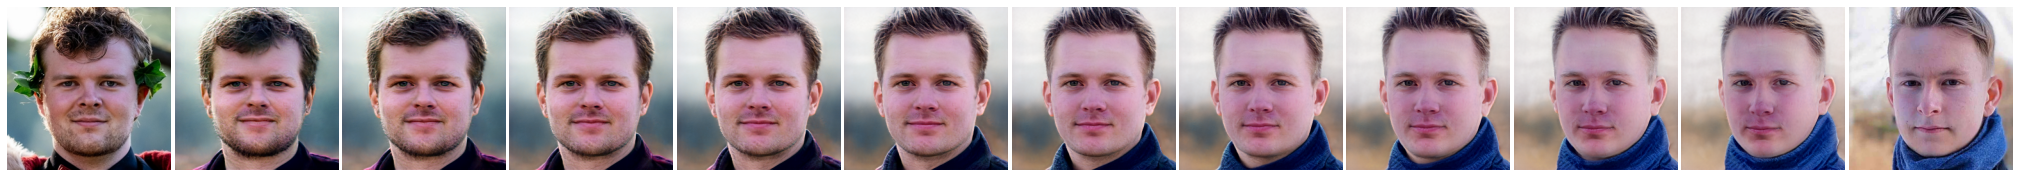

In [6]:
# morphed is a list of images containing lists of images
# each list of images is a morphing sequence between two images
# let's plot the first morphing sequence
for i, morphing in enumerate(morphed):
	fig, ax = plt.subplots(1, len(morphing), figsize=(len(morphing) * 3, 3))
	for j, img in enumerate(morphing):
		ax[j].imshow(img)
		ax[j].axis('off')
		ax[j].set_frame_on(False)
	plt.subplots_adjust(wspace=0, hspace=0)
	plt.show()
	fig.savefig('output/morphing' + str(i) + '.png')
